## Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU.


## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

<!--BOOK_INFORMATION-->

*This notebook using part of the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

In [ ]:
# Use seaborn for pairplot
!pip install seaborn

# Use some functions from tensorflow_docs
#!pip install git+https://github.com/tensorflow/docs

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)
import os
os.open?

#Use Ctrl space 

2.2.0


In [ ]:
#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling

In [ ]:
%matplotlib inline
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

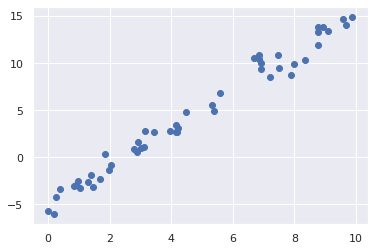

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Using Tensorflow, and Keras library to make a model for simple linear regression problem.

In [ ]:
'''
x_train,x_test=np.split(x, [int(round(0.8*len(x),0))])
y_train,y_val=np.split(y, [int(round(0.8*len(y),0))])
train_dataset = (x_train,y_train)#dataset.sample(frac=0.8,random_state=0)
test_dataset = (x_test)
'''
#Normally dataset will be splitted in to trainning set and validation set.
#With the simple linear regression, the validation part has been skipped.
train_dataset = (x,y)      

In [ ]:
'''
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[1]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])
'''
#using NN network with one activation layer with 32 Neuron. 

model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[1]),
    keras.layers.Dense(1)
  ])

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mae', 'mse'])
history=model.fit(x,y,epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 63.2138 - mae: 6.3880 - mse: 63.2138
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 42.2478 - mae: 5.2867 - mse: 42.2478
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 32.5155 - mae: 4.6658 - mse: 32.5155
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 25.8255 - mae: 4.2094 - mse: 25.8255
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 21.0440 - mae: 3.8413 - mse: 21.0440
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 17.3997 - mae: 3.5523 - mse: 17.3997
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 14.6290 - mae: 3.3234 - mse: 14.6290
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 12.8660 - mae: 3.1481 - mse: 12.8660
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 11.7863 - mae: 3.0283 - mse: 11.7863
Epoch 10/100
2/2 [==========

The loss function is used to compare the differences between real and predicted value(y_pred and y).

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist['loss'])

0     63.213848
1     42.247799
2     32.515533
3     25.825455
4     21.043987
        ...    
95     1.529703
96     1.476443
97     1.480014
98     1.576198
99     1.407289
Name: loss, Length: 100, dtype: float64


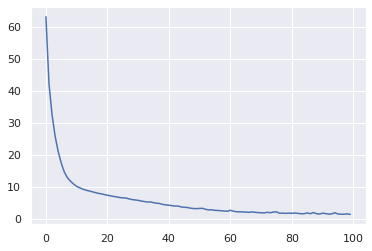

In [ ]:
plt.plot(hist['loss'])    #plot the loss funtion

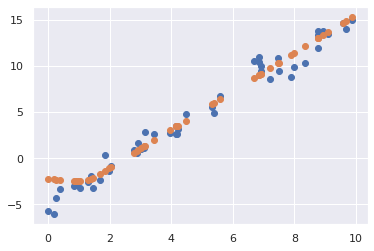

In [ ]:
#testing the model with input x
ypre= model.predict(x)
#plot original data
plt.scatter(x, y)
#plot data output from the model         
plt.scatter(x, ypre)

In [ ]:
#weights=model.get_weights() 
#print(weights)

We can also use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line. 




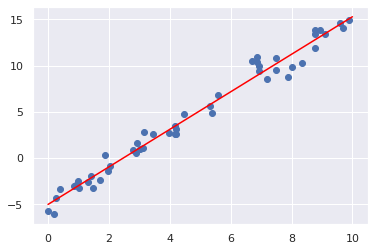

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,'red');

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


We see that the results are very close to the inputs, as we might hope.

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)

print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
We have seen one version of this before, in the ``PolynomialRegression`` pipeline used in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) and [Feature Engineering](05.04-Feature-Engineering.ipynb).
The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression.

As we saw in [Feature Engineering](05.04-Feature-Engineering.ipynb), the cleanest way to accomplish this is to use a pipeline.
Let's make a 7th-degree polynomial model in this way:

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

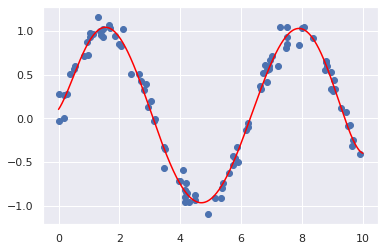

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)                
y = np.sin(x) + 0.1 * rng.randn(100)

poly_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
#print(len(xfit))
#print(len(yfit))

plt.scatter(x, y)
plt.plot(xfit, yfit,'red');

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

Try again with the NN

In [ ]:
#train_dataset = (x,y)  

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[1]),
    keras.layers.Dense(1)
  ])

In [ ]:
#if the model does not shows a good fit uncomment the section below and run the next section again
'''
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.sigmoid, input_shape=[1]),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    keras.layers.Dense(1)
  ])
#sigmoid,relu
'''

'\nmodel = keras.Sequential([\n    keras.layers.Dense(32, activation=tf.nn.sigmoid, input_shape=[1]),\n    keras.layers.Dense(32, activation=tf.nn.sigmoid),\n    keras.layers.Dense(32, activation=tf.nn.sigmoid),\n    keras.layers.Dense(1)\n  ])\n#sigmoid,relu\n'

In [ ]:

optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mae', 'mse'])
history=model.fit(x,y,epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 0.7464 - mae: 0.7489 - mse: 0.7464
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.4572 - mae: 0.5865 - mse: 0.4572
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.4692 - mae: 0.5929 - mse: 0.4692
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.4831 - mae: 0.6038 - mse: 0.4831
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 0.4302 - mae: 0.5678 - mse: 0.4302
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5099 - mae: 0.5776 - mse: 0.5099
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4331 - mae: 0.5620 - mse: 0.4331
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5000 - mae: 0.6081 - mse: 0.5000
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4872 - mae: 0.6085 - mse: 0.4872
Epoch 10/500
4/4 [============================

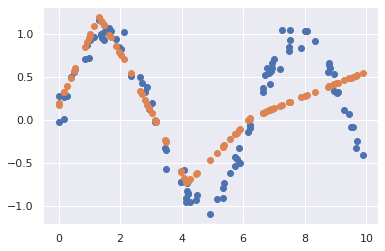

In [ ]:
ypre= model.predict(x)
plt.scatter(x, y)
plt.scatter(x, ypre)
#plt.scatter(test_dataset,y_val)

Try to create different set of data and play with Tensorflow NN library

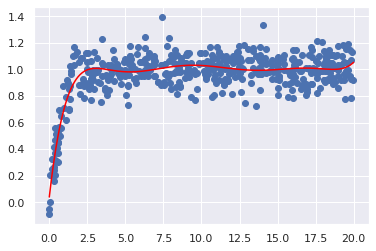

In [ ]:
#play with different a, b value and see the results

a=20        #a = 20,30
b=500       #b = 100,200,500

rng = np.random.RandomState(1)
x = a * rng.rand(b)                
y = np.tanh(x) + 0.1 * rng.randn(b) #use tanh function

poly_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 20, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,'red');
#plt.scatter(x, y)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.sigmoid, input_shape=[1]),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    keras.layers.Dense(1)
  ])
#play with different activation function such as sigmoid,relu ... and see the results

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mae', 'mse'])
history=model.fit(x,y,epochs=500)

Epoch 1/500
16/16 [==============================] - 0s 4ms/step - loss: 0.1206 - mae: 0.2126 - mse: 0.1206
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0645 - mae: 0.1772 - mse: 0.0645
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0512 - mae: 0.1701 - mse: 0.0512
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0352 - mae: 0.1451 - mse: 0.0352
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0201 - mae: 0.1069 - mse: 0.0201
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0481 - mae: 0.1721 - mse: 0.0481
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0285 - mae: 0.1368 - mse: 0.0285
Epoch 8/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0247 - mae: 0.1244 - mse: 0.0247
Epoch 9/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0254 - mae: 0.1291 - mse: 0.0254
Epoch 10/500
16/16 [========

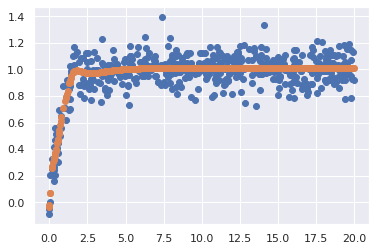

In [ ]:
ypre= model.predict(x)
plt.scatter(x, y)
plt.scatter(x, ypre)
#plt.scatter(test_dataset,y_val)

In [ ]:
'''
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
get_available_gpus()
'''

"\nfrom tensorflow.python.client import device_lib\n\ndef get_available_gpus():\n    local_device_protos = device_lib.list_local_devices()\n    return [x.name for x in local_device_protos if x.device_type == 'GPU']\nget_available_gpus()\n"

In [ ]:
'''
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
'''

'\nfrom tensorflow.python.client import device_lib\nprint(device_lib.list_local_devices())\n'